In [1]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
X = data['data']
y = data['target']

In [6]:
X.shape, y.shape

((569, 30), (569,))

In [7]:
"""
1. split a test set
2. scale 
3. fit a model
4. cross - validate
5. optimize

"""

'\n1. split a test set\n2. scale \n3. fit a model\n4. cross - validate\n5. optimize\n\n'

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler().fit(X_train)

In [12]:
X_train_scaled = scaler.transform(X_train)

In [13]:
from sklearn.manifold import TSNE

In [50]:
tsne = TSNE(random_state=42, perplexity=100.0, n_components=2, 
            early_exaggeration=12.0, learning_rate=400.0, n_iter=1000,
           n_iter_without_progress=300) 
            
           # learning_rate=200.0, n_iter=1000, 
           # n_iter_without_progress=300, min_grad_norm=1e-07, metric=’euclidean’, 
           # init=’random’, verbose=0, random_state=None, method=’barnes_hut’, angle=0.5)  

In [51]:
res_tsne = tsne.fit_transform(X_train_scaled)

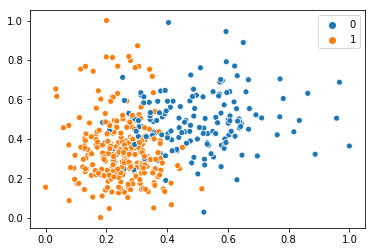

In [52]:
sns.scatterplot(X_train_scaled[:,0], X_train_scaled[:,1],hue=y_train)

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [56]:
data = load_breast_cancer()
logreg = LogisticRegression()

In [71]:
scores = cross_val_score(logreg, X, y, cv=4)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.93706294 0.93661972 0.97183099 0.93661972]


C:\Users\Pippo\Anaconda3\envs\Test\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pippo\Anaconda3\envs\Test\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pippo\Anaconda3\envs\Test\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pippo\Anaconda3\envs\Test\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
print('Average cross-validation scores: {:.2f}'.format(scores.mean()))

Average cross-validation scores: 0.95
